In [1]:
include("../stage_1_optimization/stage_1_optimization.jl")
include("../stage_1_optimization/stage_1_data_processing.jl")
include("../stage_1_optimization/stage_1_visualization.jl")
include("../path_generation/path_generation_data_processing.jl")
include("../stage_1_optimization/stage_1_random_assignment.jl");

Academic license - for non-commercial use only


# Load and process data

In [5]:
# File paths
NODES_FILE_PATH = "../data/paranagua_nodes_v2.csv"
EDGES_FILE_PATH = "../data/paranagua_edges_index.csv"
DELIVERIES_FILE_PATH = "../data/example_schedule_deliveries.csv"
PICKUPS_FILE_PATH = "../data/example_schedule_pickups.csv";

In [6]:
# Get node balances from example schedule
node_balances = get_node_balances_from_schedule(DELIVERIES_FILE_PATH, PICKUPS_FILE_PATH)

# Get cost matrix for terminals in example schedule
cost_matrix = get_cost_matrix(NODES_FILE_PATH, EDGES_FILE_PATH, DELIVERIES_FILE_PATH)

# Get location and commodity names from example schedule (for plotting)
terminal_names, commodity_names = get_terminal_and_commodity_names_from_schedule(DELIVERIES_FILE_PATH)

# Set other problem parameters
max_capacity = 100
num_locomotives = 6;

# Solve model and visualize assignments

In [7]:
routes = optimize_routes(node_balances, cost_matrix, num_locomotives, max_capacity, λ=1);

Optimizing...
Objective value: 1428.0
Objective bound: 1428.0
MIP gap: 0.0
Time elapsed: 7.99s
All validation checks passed.


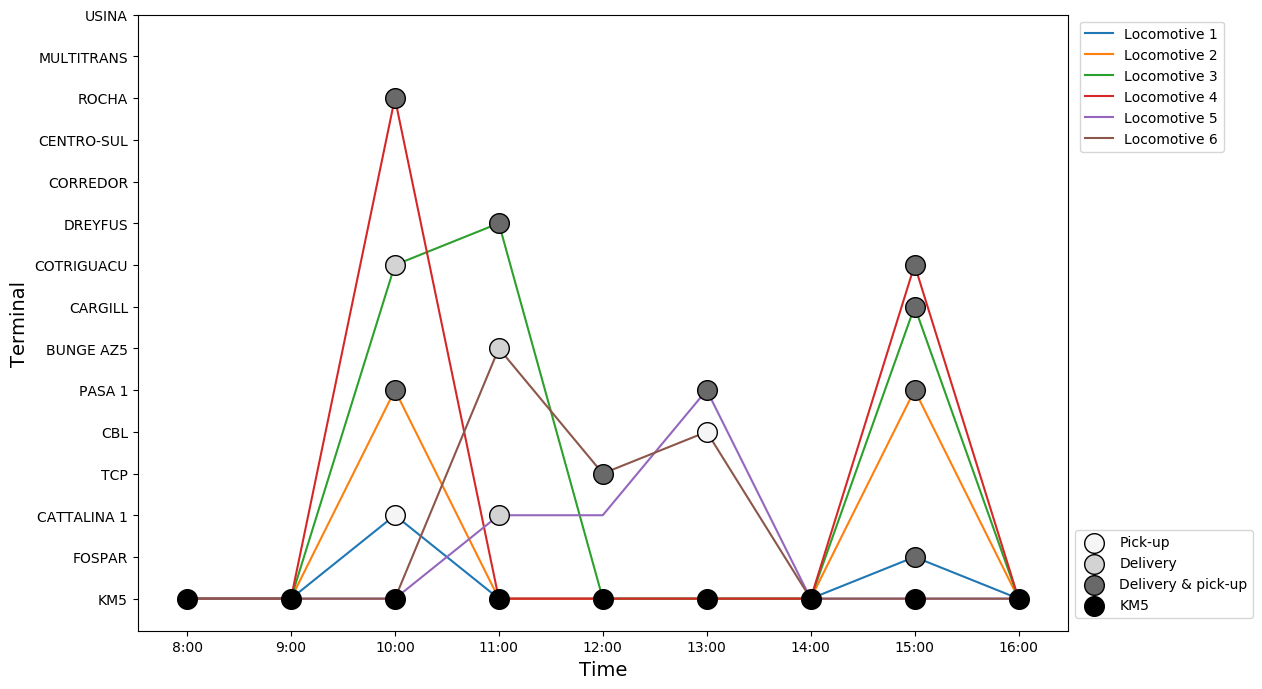

In [8]:
plot_routes(routes, node_balances, terminal_names);

In [9]:
num_periods = size(node_balances, 2)
for route_id=1: num_locomotives       
    print_route(routes[route_id], num_periods, terminal_names, commodity_names; start_hour=15)
end

Time: 15:00	 Terminal: KM5       	 Activity: load/unload
Time: 16:00	 Terminal: KM5       	 Activity: load/unload
Time: 17:00	 Terminal: CATTALINA 	 Activity: pick-up 16 cars of CRR
Time: 18:00	 Terminal: KM5       	 Activity: load/unload
Time: 19:00	 Terminal: KM5       	 Activity: load/unload
Time: 20:00	 Terminal: KM5       	 Activity: load/unload
Time: 21:00	 Terminal: KM5       	 Activity: load/unload
Time: 22:00	 Terminal: FOSPAR    	 Activity: deliver 15 cars of F100
Time: 22:00	 Terminal: FOSPAR    	 Activity: pick-up 11 cars of ADU
Time: 23:00	 Terminal: KM5       	 Activity: load/unload
Time: 15:00	 Terminal: KM5       	 Activity: load/unload
Time: 16:00	 Terminal: KM5       	 Activity: load/unload
Time: 17:00	 Terminal: PASA 1    	 Activity: deliver 18 cars of AÇ
Time: 17:00	 Terminal: PASA 1    	 Activity: pick-up 24 cars of VZ
Time: 18:00	 Terminal: KM5       	 Activity: load/unload
Time: 19:00	 Terminal: KM5       	 Activity: load/unload
Time: 20:00	 Terminal: KM5       	

# Estimate solution improvement

In [12]:
jobs = get_jobs_from_routes(routes)
random_assignment_costs = generate_random_assignment_costs(jobs, num_periods, max_capacity);

In [25]:
min_cost = get_cost_for_optimal_routes(routes, cost_matrix, num_periods)
println("Estimated improvement: ", round(estimate_pct_cost_saving(min_cost, random_assignment_costs), digits=2),"%")

Estimated improvement: 10.87%


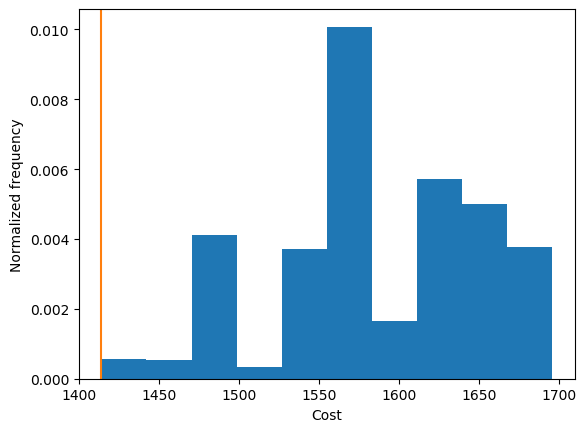

PyObject Text(24.0, 0.5, 'Normalized frequency')

In [26]:
plot_cost_distribution(min_cost, random_assignment_costs)